In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [3]:
# Load dataset from the "nutrient" folder
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "nutrient",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 5036 files belonging to 3 classes.


In [4]:
# Split dataset into training, validation, and test sets
train_size = 0.7
val_size = 0.2
test_size = 0.1

train_ds = dataset.take(int(len(dataset) * train_size))
val_ds = dataset.skip(int(len(dataset) * train_size)).take(int(len(dataset) * val_size))
test_ds = dataset.skip(int(len(dataset) * (train_size + val_size)))


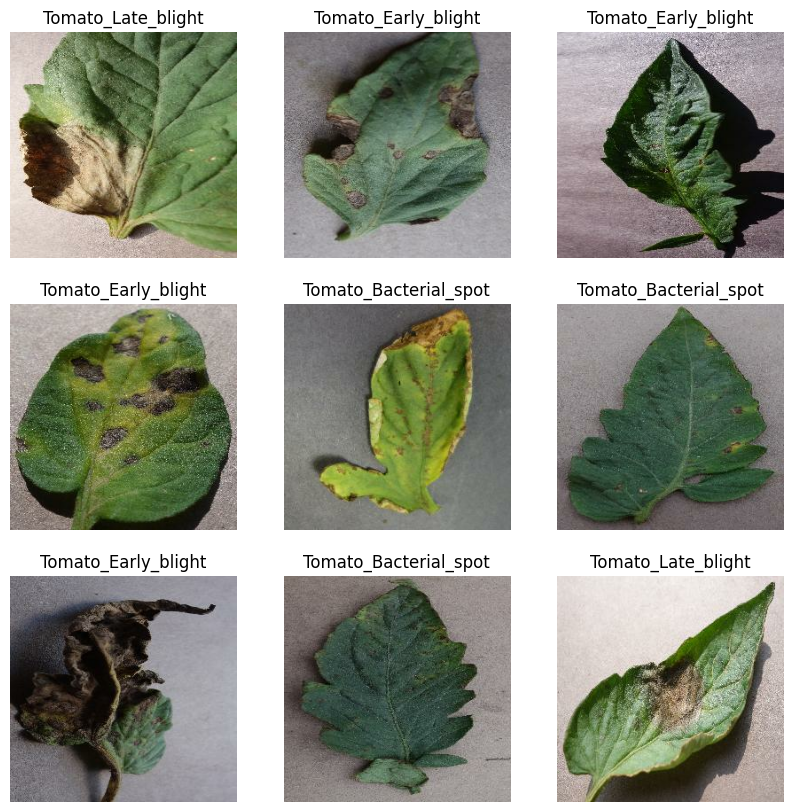

In [5]:
# Visualize a few sample images from the dataset
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [6]:
# Build the CNN model with a reduced dense layer
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Reduced dense layer to 128 units
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/10


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.4783 - loss: 10.6052 - val_accuracy: 0.6401 - val_loss: 0.8835
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.6107 - loss: 0.8942 - val_accuracy: 0.6552 - val_loss: 0.8709
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.5896 - loss: 1.0963 - val_accuracy: 0.5998 - val_loss: 0.8667
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.5998 - loss: 0.8666 - val_accuracy: 0.6593 - val_loss: 0.7589
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.6609 - loss: 0.7670 - val_accuracy: 0.7107 - val_loss: 0.6881
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7479 - loss: 0.6413 - val_accuracy: 0.7369 - val_loss: 0.6594
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7929 - loss: 0.5706 - val_accuracy: 0.7903 - val_loss: 0.6211
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8210 - loss: 0.4940 - val_accuracy: 0.85

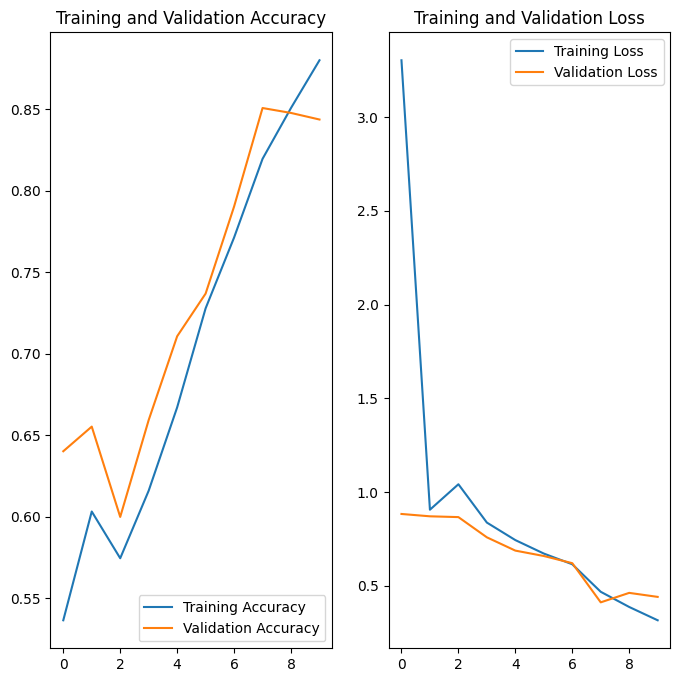

In [7]:
# Plot Training and Validation Accuracy/Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [8]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.8040 - loss: 0.5812
Test accuracy: 79.27%


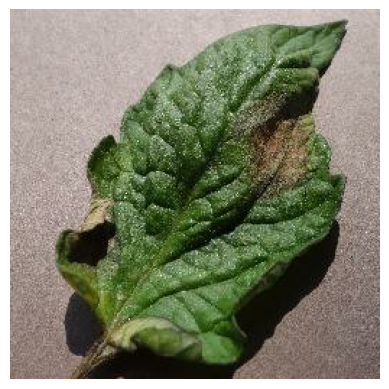

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Tomato_Bacterial_spot: 0.01%
Tomato_Early_blight: 38.66%
Tomato_Late_blight: 61.33%
Predicted nutrient deficiency: Tomato_Late_blight with 61.33% confidence


In [9]:
# Make predictions on a sample image from the test set
for images, labels in test_ds.take(1):
    sample_image = images[0]  # Use the first image
    plt.imshow(sample_image.numpy().astype("uint8"))
    plt.axis("off")
    plt.show()

    sample_image_expanded = tf.expand_dims(sample_image, axis=0)  # Expand dimensions for model input
    predictions = model.predict(sample_image_expanded)
    confidence_scores = predictions[0]

    # Display confidence scores
    for i, score in enumerate(confidence_scores):
        print(f"{class_names[i]}: {score * 100:.2f}%")

    # Show predicted class
    predicted_class = class_names[tf.argmax(confidence_scores)]
    print(f"Predicted nutrient deficiency: {predicted_class} with {tf.reduce_max(confidence_scores) * 100:.2f}% confidence")
